# PFM: Data Collection - REE API

The objective of this session is to understand how data can be retrieved from specific sources as REE API.

To do so, we will use `requests` library and `json` libraries for Python. These libraries are considered as wrappers. 

Later on, we will use specific libraries for plotting as `matplotlib` and `datetime`. 

In [110]:
# import requests library
import requests 
import json
# import plotting library
import matplotlib
import matplotlib.pyplot as plt 
import datetime


As we have seen before, when we work with APIs, we have to write the endpoint we want to access. 
We need to write also the folder/section we want to access. We can have the same endpoint and different sections from where to get information. 

Most of the times, we need to add some headers to our requests that are required to get the information. The most important one is the **Authorization**, which corresponds to our ID to access that API. 

In [111]:
endpoint = 'https://api.esios.ree.es'
get_archives = '/archives_json'
headers = {'Accept': 'application/json;application/vnd.esios-api-v1+json',
           'Host': 'api.esios.ree.es',
           'Authorization': 'Token token=\"3627f9a1b46617055cb615ed161382e551ec7baa18466965dfd2cda3ebfc7307"',
          }

params = {'date': '20190101'}


Then, we can write the request according to the requests library and get callable object.

In [112]:
request = requests.get(endpoint+get_archives, headers=headers, params=params)

After that, we can check if the request is correct or not according to the response we get from the API. 

In [113]:
request

<Response [200]>

In this case, the response we get is **200**, meaning that is has been accepted and the connection is established. 
There are different codes that tell us which is our connection status between us and the API. 

In [114]:
status = request.status_code

In [115]:
#Check the status code
if status < 200:
    print('informational')
    # If the status code is 200, treat the information.
elif status >= 200 and status < 300:
    print('Connection is established')
    #okBehavior(response) # runs the function to get list of archives
elif status >= 300 and status < 400:
    print('redirection')
elif status >= 400 and status < 500:
    print('client error')
else:
    print('server error')

Connection is established


The data can be accessed by means of a json file. By doing this, we can see all the IDs available for us to obtain data. 

In [116]:
# accessing data by means of a json object
data = request.json()

In [117]:
data

{'archives': [{'id': 170,
   'name': 'IND_CoeficientesCO2',
   'description': 'IND_CoeficientesCO2',
   'horizon': 'NA',
   'archive_type': 'json',
   'json_download': {'name': 'IND_CoeficientesCO2',
    'type': 'JSON',
    'url': '/archives/170/download_json?locale=es'},
   'taxonomy_terms': [],
   'vocabularies': [{'id_vocabulary': 20, 'name': 'Universo'},
    {'id_vocabulary': 21, 'name': 'Temática'},
    {'id_vocabulary': 22, 'name': 'Área'}]},
  {'id': 169,
   'name': 'IND_EnergiaAnualNacional',
   'description': 'IND_EnergiaAnualNacional',
   'horizon': 'A',
   'archive_type': 'json',
   'json_download': {'name': 'IND_EnergiaAnualNacional',
    'type': 'JSON',
    'url': '/archives/169/download_json?locale=es'},
   'taxonomy_terms': [],
   'vocabularies': [{'id_vocabulary': 20, 'name': 'Universo'},
    {'id_vocabulary': 21, 'name': 'Temática'},
    {'id_vocabulary': 22, 'name': 'Área'}]},
  {'id': 168,
   'name': 'IND_EnergiaMensualNacional',
   'description': 'IND_EnergiaMensual

As we can see from the script below, we can see different IDs that are related to different types of information. For example: 

- ID:140 → means the Annual Energy consumed by resource type. 
- ID:139 → means the Monthly Energy consumed by resource type. 
- ID:64 → Installed capacity in Spain, per resource.
- ID:115 → Demanda Real Generada.
- ID:114 → Demanda Prevista Generada.
- ID:111 → Datos estructurales de las unidades de programación.
- ID:110 → Datos estructurales de las unidades de generación.
- ID:82/81?


In our case, today we would like to check ID 66, analysing the final PVPC prices for different days and timeperiods. 

## DEMANDA REAL GENERADA

In [118]:
get_json = '/archives/115/download_json?locale=es'
request = requests.get(endpoint+get_json, headers=headers, params=params)
request

<Response [200]>

In [119]:
request.headers

{'Date': 'Mon, 21 Sep 2020 10:01:22 GMT', 'Server': 'MSX-2', 'Strict-Transport-Security': 'max-age=63072000;', 'X-Frame-Options': 'SAMEORIGIN, SAMEORIGIN', 'Content-Type': 'application/json', 'Status': '200 OK', 'X-XSS-Protection': '1; mode=block', 'X-Content-Type-Options': 'nosniff', 'Content-Disposition': 'download; filename="IND_DemandaRealGen"', 'Content-Transfer-Encoding': 'binary', 'Cache-Control': 'private', 'X-Request-Id': '68776918-b7ce-4950-a1c4-ca02acf7a0aa', 'X-Runtime': '0.058782', 'Referrer-policy': 'no-referrer', 'Keep-Alive': 'timeout=5, max=100', 'Connection': 'Keep-Alive', 'Transfer-Encoding': 'chunked', 'Set-Cookie': 'visid_incap_1885724=99Ez0v16SJm0RtlhL5QHVPJ5aF8AAAAAQUIPAAAAAADnrpHz14k37AyE7mxOkdxu; expires=Mon, 20 Sep 2021 18:33:29 GMT; HttpOnly; path=/; Domain=.esios.ree.es; Secure; SameSite=None, incap_ses_507_1885724=V/L8d8pITFXEZ7ej/DkJB/J5aF8AAAAAGj78vl7Pw98KckiN4PqbJw==; path=/; Domain=.esios.ree.es; Secure; SameSite=None', 'X-CDN': 'Incapsula', 'Content-En

In [120]:
request.text

'IND_DemandaRealGen({"valoresHorariosGeneracion":[{"ts":"2018-12-31 21:00","dem":29148,"nuc":6079,"gf":0,"car":2519,"cc":4653,"hid":4660,"eol":3395,"aut":0,"inter":4560,"icb":-253,"sol":30,"solFot":2,"solTer":28,"termRenov":376,"cogenResto":3103},{"ts":"2018-12-31 21:10","dem":28937,"nuc":6072,"gf":0,"car":2546,"cc":4759,"hid":4592,"eol":3440,"aut":0,"inter":4273,"icb":-224,"sol":30,"solFot":2,"solTer":27,"termRenov":377,"cogenResto":3087},{"ts":"2018-12-31 21:20","dem":28555,"nuc":6073,"gf":0,"car":2535,"cc":4744,"hid":4233,"eol":3438,"aut":0,"inter":4241,"icb":-202,"sol":30,"solFot":2,"solTer":28,"termRenov":377,"cogenResto":3087},{"ts":"2018-12-31 21:30","dem":28120,"nuc":6077,"gf":0,"car":2471,"cc":4586,"hid":3639,"eol":3495,"aut":0,"inter":4540,"icb":-201,"sol":30,"solFot":2,"solTer":28,"termRenov":377,"cogenResto":3087},{"ts":"2018-12-31 21:40","dem":27680,"nuc":6078,"gf":0,"car":2339,"cc":4578,"hid":3765,"eol":3567,"aut":0,"inter":4052,"icb":-201,"sol":30,"solFot":2,"solTer":27,

In [121]:
fix_json=lambda t:json.loads(t[t.find('(')+1:t.rfind(')')])
fix_json(request.text)

{'valoresHorariosGeneracion': [{'ts': '2018-12-31 21:00',
   'dem': 29148,
   'nuc': 6079,
   'gf': 0,
   'car': 2519,
   'cc': 4653,
   'hid': 4660,
   'eol': 3395,
   'aut': 0,
   'inter': 4560,
   'icb': -253,
   'sol': 30,
   'solFot': 2,
   'solTer': 28,
   'termRenov': 376,
   'cogenResto': 3103},
  {'ts': '2018-12-31 21:10',
   'dem': 28937,
   'nuc': 6072,
   'gf': 0,
   'car': 2546,
   'cc': 4759,
   'hid': 4592,
   'eol': 3440,
   'aut': 0,
   'inter': 4273,
   'icb': -224,
   'sol': 30,
   'solFot': 2,
   'solTer': 27,
   'termRenov': 377,
   'cogenResto': 3087},
  {'ts': '2018-12-31 21:20',
   'dem': 28555,
   'nuc': 6073,
   'gf': 0,
   'car': 2535,
   'cc': 4744,
   'hid': 4233,
   'eol': 3438,
   'aut': 0,
   'inter': 4241,
   'icb': -202,
   'sol': 30,
   'solFot': 2,
   'solTer': 28,
   'termRenov': 377,
   'cogenResto': 3087},
  {'ts': '2018-12-31 21:30',
   'dem': 28120,
   'nuc': 6077,
   'gf': 0,
   'car': 2471,
   'cc': 4586,
   'hid': 3639,
   'eol': 3495,
   'au

info:
Es el sumatorio de la medida en tiempo real para los distintos tipos de producción.
El desglose de este indicador proporciona los MW generados por cada tipo de producción medidos en tiempo real.
Publicación: cada 10 minutos con la información de los 10 minutos anteriores.

Podemos obtener estos datos con enlace web URL Indicador DEMANDA REAL SUMA GENERACIÓN:
https://www.esios.ree.es/es/analisis/10004?vis=1&start_date=01-01-2019T00%3A00&end_date=01-01-2019T23%3A50&compare_start_date=31-12-2018T00%3A00&groupby=minutes10&compare_indicators=550,1297,1295,1294,1296,547,554,551,548,546,553,549,552,555

Podemos conseguir mucha info interesante creo así y desglosar según nuestros intereses.

In [122]:
request.headers

{'Date': 'Mon, 21 Sep 2020 10:01:22 GMT', 'Server': 'MSX-2', 'Strict-Transport-Security': 'max-age=63072000;', 'X-Frame-Options': 'SAMEORIGIN, SAMEORIGIN', 'Content-Type': 'application/json', 'Status': '200 OK', 'X-XSS-Protection': '1; mode=block', 'X-Content-Type-Options': 'nosniff', 'Content-Disposition': 'download; filename="IND_DemandaRealGen"', 'Content-Transfer-Encoding': 'binary', 'Cache-Control': 'private', 'X-Request-Id': '68776918-b7ce-4950-a1c4-ca02acf7a0aa', 'X-Runtime': '0.058782', 'Referrer-policy': 'no-referrer', 'Keep-Alive': 'timeout=5, max=100', 'Connection': 'Keep-Alive', 'Transfer-Encoding': 'chunked', 'Set-Cookie': 'visid_incap_1885724=99Ez0v16SJm0RtlhL5QHVPJ5aF8AAAAAQUIPAAAAAADnrpHz14k37AyE7mxOkdxu; expires=Mon, 20 Sep 2021 18:33:29 GMT; HttpOnly; path=/; Domain=.esios.ree.es; Secure; SameSite=None, incap_ses_507_1885724=V/L8d8pITFXEZ7ej/DkJB/J5aF8AAAAAGj78vl7Pw98KckiN4PqbJw==; path=/; Domain=.esios.ree.es; Secure; SameSite=None', 'X-CDN': 'Incapsula', 'Content-En

In [123]:
demanda = []

In [124]:
for time_period in fix_json(request.text)['valoresHorariosGeneracion']:
    demanda.append(time_period['dem'])
    print(f"Demand at {time_period['ts']} is {time_period['dem']} MW")

Demand at 2018-12-31 21:00 is 29148 MW
Demand at 2018-12-31 21:10 is 28937 MW
Demand at 2018-12-31 21:20 is 28555 MW
Demand at 2018-12-31 21:30 is 28120 MW
Demand at 2018-12-31 21:40 is 27680 MW
Demand at 2018-12-31 21:50 is 27207 MW
Demand at 2018-12-31 22:00 is 26695 MW
Demand at 2018-12-31 22:10 is 26453 MW
Demand at 2018-12-31 22:20 is 26058 MW
Demand at 2018-12-31 22:30 is 25696 MW
Demand at 2018-12-31 22:40 is 25419 MW
Demand at 2018-12-31 22:50 is 25232 MW
Demand at 2018-12-31 23:00 is 25055 MW
Demand at 2018-12-31 23:10 is 24762 MW
Demand at 2018-12-31 23:20 is 24656 MW
Demand at 2018-12-31 23:30 is 24486 MW
Demand at 2018-12-31 23:40 is 24365 MW
Demand at 2018-12-31 23:50 is 24212 MW
Demand at 2019-01-01 00:00 is 23676 MW
Demand at 2019-01-01 00:10 is 23511 MW
Demand at 2019-01-01 00:20 is 23531 MW
Demand at 2019-01-01 00:30 is 23420 MW
Demand at 2019-01-01 00:40 is 23352 MW
Demand at 2019-01-01 00:50 is 23264 MW
Demand at 2019-01-01 01:00 is 23128 MW
Demand at 2019-01-01 01:1

### Demand curve

In [125]:
demanda

[29148,
 28937,
 28555,
 28120,
 27680,
 27207,
 26695,
 26453,
 26058,
 25696,
 25419,
 25232,
 25055,
 24762,
 24656,
 24486,
 24365,
 24212,
 23676,
 23511,
 23531,
 23420,
 23352,
 23264,
 23128,
 23108,
 22889,
 22705,
 22548,
 22308,
 22109,
 21824,
 21550,
 21297,
 21044,
 20867,
 20666,
 20528,
 20349,
 20159,
 20012,
 19859,
 19680,
 19636,
 19530,
 19411,
 19305,
 19219,
 19227,
 19221,
 19168,
 19159,
 19114,
 19095,
 19156,
 19329,
 19247,
 19331,
 19348,
 19378,
 19471,
 19703,
 19773,
 19686,
 19902,
 19900,
 19873,
 19961,
 19793,
 19670,
 19650,
 19566,
 19642,
 19894,
 20101,
 20326,
 20671,
 20940,
 21205,
 21519,
 21809,
 22020,
 22449,
 22515,
 22733,
 23043,
 23217,
 23431,
 23523,
 23610,
 23682,
 23691,
 23710,
 23757,
 23964,
 24026,
 24151,
 24218,
 24323,
 24302,
 24415,
 24489,
 24552,
 24598,
 24473,
 24311,
 24106,
 23817,
 23733,
 23461,
 23135,
 22908,
 22772,
 22687,
 22561,
 22613,
 22547,
 22422,
 22436,
 22485,
 22574,
 22658,
 22559,
 22746,
 22958,


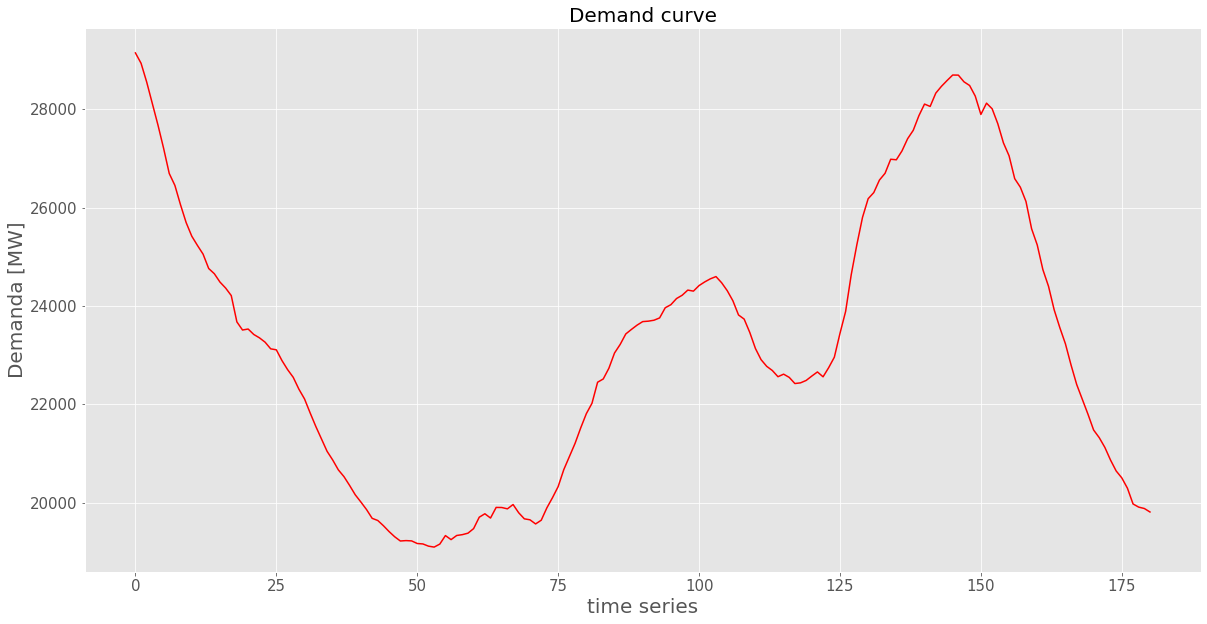

In [126]:
matplotlib.rc('xtick', labelsize=15)     
matplotlib.rc('ytick', labelsize=15)

plt.style.use('ggplot')
plt.figure(figsize=(20,10))
plt.plot(demanda,'r',linewidth=1.5)
plt.title(f"Demand curve", fontsize=20)
plt.xlabel('time series',fontsize=20 )
plt.ylabel('Demanda [MW]',fontsize=20)
plt.show()

## OTROS INDICADORES

In [145]:
get_json = '/archives/114/download_json?locale=es'
request = requests.get(endpoint+get_json, headers=headers, params=params)
request

<Response [200]>

In [146]:
fix_json=lambda t:json.loads(t[t.find('(')+1:t.rfind(')')])
fix_json(request.text)

{'valoresPrevistaProgramada': [{'ts': '2018-12-31 21:00',
   'pro': 27658,
   'pre': 29109},
  {'ts': '2018-12-31 21:10', 'pro': 27658, 'pre': 28797},
  {'ts': '2018-12-31 21:20', 'pro': 27658, 'pre': 28453},
  {'ts': '2018-12-31 21:30', 'pro': 27658, 'pre': 28075},
  {'ts': '2018-12-31 21:40', 'pro': 27658, 'pre': 27664},
  {'ts': '2018-12-31 21:50', 'pro': 27658, 'pre': 27219},
  {'ts': '2018-12-31 22:00', 'pro': 25423, 'pre': 26741},
  {'ts': '2018-12-31 22:10', 'pro': 25423, 'pre': 26278},
  {'ts': '2018-12-31 22:20', 'pro': 25423, 'pre': 25877},
  {'ts': '2018-12-31 22:30', 'pro': 25423, 'pre': 25539},
  {'ts': '2018-12-31 22:40', 'pro': 25423, 'pre': 25263},
  {'ts': '2018-12-31 22:50', 'pro': 25423, 'pre': 25050},
  {'ts': '2018-12-31 23:00', 'pro': 23922, 'pre': 24899},
  {'ts': '2018-12-31 23:10', 'pro': 23922, 'pre': 24771},
  {'ts': '2018-12-31 23:20', 'pro': 23922, 'pre': 24627},
  {'ts': '2018-12-31 23:30', 'pro': 23922, 'pre': 24466},
  {'ts': '2018-12-31 23:40', 'pro': 2

#### Leyenda
pro: Potencia programada según P48. Es la demanda de energía programada calculada mediante los intercambios internacionales programados y los programas de los grupos de generación a los que se les haya asignado suministro de energía en la casación de los mercados diario e intradiario, así como en los mercados de energías de balance RR y regulación terciaria. Estos dos últimos son gestionados por REE teniendo en cuenta la evolución de la demanda.

pre: Potencia prevista según REE teniendo en cuenta los valores de consumo registrados en periodos precedentes similares, así como otros factores con influencia en el consumo eléctrico como la laboralidad, la climatología y la actividad económica. 

NOTA: creo que puedo conseguir el P48 (programado) desglosado por tecnología, con el enlace URL como hacemos más abajo en el day-ahead market. Quizás nos va mejor para nuestro modelo. Pero perderemos granularidad, de 10 minutos a periodos horarios.

https://www.esios.ree.es/es/balance?date=01-01-2019&program=P48&agg=hour

In [129]:
get_json = '/archives/111/download_json?locale=es'
request = requests.get(endpoint+get_json, headers=headers, params=params)
request.json()

{'message': 'No values for specified archive'}

In [130]:
get_json = '/archives/110/download_json?locale=es'
request = requests.get(endpoint+get_json, headers=headers, params=params)
request.json()

{'message': 'No values for specified archive'}

In [131]:
get_json = '/archives/82/download_json?locale=es'
request = requests.get(endpoint+get_json, headers=headers, params=params)
request.json()

{'message': 'No values for specified archive'}

In [132]:
get_json = '/archives/81/download_json?locale=es'
request = requests.get(endpoint+get_json, headers=headers, params=params)
request.json()

{'message': 'No values for specified archive'}

In [133]:
get_json = '/archives/65/download_json?locale=es'
request = requests.get(endpoint+get_json, headers=headers, params=params)
request.json()

{'PrecioDesvíos': [{'Precio': [{'Dia': '01-01-2019',
     'Hora': '00-01',
     'PRSU': '66,88',
     'PRBA': '66,88',
     'COS': '-',
     'SEN': 'Bajar'},
    {'Dia': '01-01-2019',
     'Hora': '01-02',
     'PRSU': '66,88',
     'PRBA': '66,88',
     'COS': '-',
     'SEN': 'Bajar'},
    {'Dia': '01-01-2019',
     'Hora': '02-03',
     'PRSU': '38,68',
     'PRBA': '66,00',
     'COS': '41',
     'SEN': 'Subir'},
    {'Dia': '01-01-2019',
     'Hora': '03-04',
     'PRSU': '46,14',
     'PRBA': '63,64',
     'COS': '27',
     'SEN': 'Subir'},
    {'Dia': '01-01-2019',
     'Hora': '04-05',
     'PRSU': '47,06',
     'PRBA': '58,85',
     'COS': '20',
     'SEN': 'Subir'},
    {'Dia': '01-01-2019',
     'Hora': '05-06',
     'PRSU': '47,04',
     'PRBA': '55,47',
     'COS': '15',
     'SEN': 'Subir'},
    {'Dia': '01-01-2019',
     'Hora': '06-07',
     'PRSU': '47,04',
     'PRBA': '56,00',
     'COS': '16',
     'SEN': 'Subir'},
    {'Dia': '01-01-2019',
     'Hora': '07-08',
   

In [134]:
get_json = '/archives/63/download_json?locale=es'
request = requests.get(endpoint+get_json, headers=headers, params=params)
request.json()

{'Interconexiones': [{'CAPT': [{'Dia': '01-01-2019',
     'Hora': '00-01',
     'SEN': 'IMP',
     'COM': '6.733',
     'UTI': '37,0'},
    {'Dia': '01-01-2019',
     'Hora': '00-01',
     'SEN': 'EXP',
     'COM': '4.933',
     'UTI': '0,0'},
    {'Dia': '01-01-2019',
     'Hora': '01-02',
     'SEN': 'IMP',
     'COM': '6.133',
     'UTI': '33,3'},
    {'Dia': '01-01-2019',
     'Hora': '01-02',
     'SEN': 'EXP',
     'COM': '6.533',
     'UTI': '0,0'},
    {'Dia': '01-01-2019',
     'Hora': '02-03',
     'SEN': 'IMP',
     'COM': '6.133',
     'UTI': '29,0'},
    {'Dia': '01-01-2019',
     'Hora': '02-03',
     'SEN': 'EXP',
     'COM': '6.533',
     'UTI': '0,0'},
    {'Dia': '01-01-2019',
     'Hora': '03-04',
     'SEN': 'IMP',
     'COM': '6.133',
     'UTI': '22,3'},
    {'Dia': '01-01-2019',
     'Hora': '03-04',
     'SEN': 'EXP',
     'COM': '6.533',
     'UTI': '0,0'},
    {'Dia': '01-01-2019',
     'Hora': '04-05',
     'SEN': 'IMP',
     'COM': '6.133',
     'UTI': '12,1

In [135]:
get_json = '/archives/62/download_json?locale=es'
request = requests.get(endpoint+get_json, headers=headers, params=params)
request.json()

{'DemandaInterrumpible': [{'Comunidades': [{'ts': '0101190000',
     'ca': 'AN',
     'dem': '137,2',
     'co2': '21,5'},
    {'ts': '0101190000', 'ca': 'AR', 'dem': '98,8', 'co2': '19,9'},
    {'ts': '0101190000', 'ca': 'AS', 'dem': '524,8', 'co2': '87,7'},
    {'ts': '0101190000', 'ca': 'CA', 'dem': '52,7', 'co2': '11,8'},
    {'ts': '0101190000', 'ca': 'CL', 'dem': '21,1', 'co2': '4,5'},
    {'ts': '0101190000', 'ca': 'CM', 'dem': '2,4', 'co2': ',4'},
    {'ts': '0101190000', 'ca': 'CT', 'dem': '122,3', 'co2': '22,3'},
    {'ts': '0101190000', 'ca': 'EX', 'dem': '3,7', 'co2': ',7'},
    {'ts': '0101190000', 'ca': 'GL', 'dem': '619,9', 'co2': '135,1'},
    {'ts': '0101190000', 'ca': 'IB', 'dem': ',2', 'co2': '0'},
    {'ts': '0101190000', 'ca': 'MA', 'dem': '17,3', 'co2': '3,2'},
    {'ts': '0101190000', 'ca': 'MU', 'dem': '11,3', 'co2': '2,5'},
    {'ts': '0101190000', 'ca': 'NA', 'dem': '26,9', 'co2': '4,4'},
    {'ts': '0101190000', 'ca': 'PV', 'dem': '71,1', 'co2': '13,9'},
    

## Day-Ahead Market Clearing Price 

In [136]:
#date_today = datetime.date.today()                # use todays prices
#date = date_today + datetime.timedelta(days=2)    # open to use tomorrows prices
#dateend = datetime.date.today()            # use to specify a date
#dateend = date                              # to use only one day

### Tomorrows prices can only be requested after 20:15 the day before. ###

#startdate = str(date_today) + "T00:00:00.00" # can specify more if desired
#enddate = str(dateend) + "T23:50:00.00"
indicator = str(600)    # market clearing (DAM) price. Imbalance is 687

# You can get it by putting the mouse over the indicator name on the webpage. 
# webpage: https://www.esios.ree.es/es/analisis/600
website = 'https://api.esios.ree.es/indicators/'+indicator+'?start_date='+'2020-06-12T00:00:00.00'+'&end_date='+'2020-06-13T00:00:00.00'

     
     
#print('Checking dates: ' , startdate , "to" , enddate) # printing the date 

URL = website # host website
GET = '/archives_json' # API link
HEADERS = {
            'Accept': "application/json; application/vnd.esios-api-v1+json",
            'Host': 'api.esios.ree.es',
            'Authorization': "Token token=\"3627f9a1b46617055cb615ed161382e551ec7baa18466965dfd2cda3ebfc7307",#"a6f2f926dea90ade64acc97b3b4fff73af5bdc5d7bce554a1adfa16d554ede81"',
            'Content-Type': 'application/json'}
#PARAMS = {'date':date}

# Runs the request to get the total URL with access token
response = requests.get(url = URL+GET, headers = HEADERS)#, params = PARAMS)

# Read the status code
status = response.status_code  

In [137]:
status

200

In [138]:
response.json()

{'indicator': {'name': 'Precio mercado SPOT Diario',
  'short_name': 'Mercado SPOT',
  'id': 600,
  'composited': False,
  'step_type': 'linear',
  'disaggregated': True,
  'magnitud': [{'name': 'Precio', 'id': 23}],
  'tiempo': [{'name': 'Hora', 'id': 4}],
  'geos': [{'geo_id': 1, 'geo_name': 'Portugal'},
   {'geo_id': 2, 'geo_name': 'Francia'},
   {'geo_id': 3, 'geo_name': 'España'},
   {'geo_id': 8824, 'geo_name': 'Reino Unido'},
   {'geo_id': 8825, 'geo_name': 'Italia'},
   {'geo_id': 8826, 'geo_name': 'Alemania'},
   {'geo_id': 8827, 'geo_name': 'Bélgica'},
   {'geo_id': 8828, 'geo_name': 'Países Bajos'},
   {'geo_id': 8830, 'geo_name': 'Nord Pool'}],
  'values_updated_at': '2020-08-27T12:56:11.000+02:00',
  'values': [{'value': 20.7,
    'datetime': '2020-06-12T00:00:00.000+02:00',
    'datetime_utc': '2020-06-11T22:00:00Z',
    'tz_time': '2020-06-11T22:00:00.000Z',
    'geo_id': 1,
    'geo_name': 'Portugal'},
   {'value': 20.72,
    'datetime': '2020-06-12T00:00:00.000+02:00',



List of market prices for day 2020-06-12 in €/MWh:
[20.7, 17.96, 17.09, 16.01, 16.0, 16.64, 19.14, 22.68, 26.01, 23.23, 21.07, 20.5, 19.45, 19.0, 17.71, 16.25, 17.4, 19.6, 20.6, 20.8, 26.01, 24.7, 25.46, 23.0, 20.98]


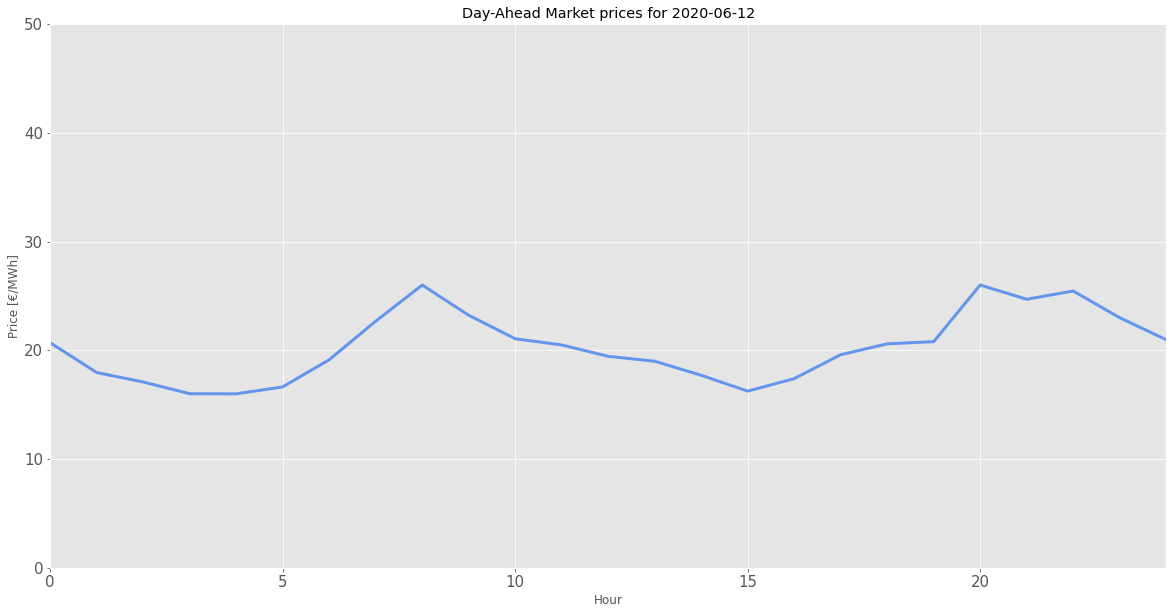

In [139]:
# Diving into the data:
marketlist = []
for stuff in response.json()["indicator"]['values']:
    #print(stuff) ## show more stuff that can be gathered
    if stuff['geo_id'] == 3: ## choose Espana. 1 = Portugal, 2 = Francia
    #print(stuff['value'])
        marketlist.append(stuff['value'])

        
print('\n')
print(f"List of market prices for day 2020-06-12 in €/MWh:")        
print(marketlist)

plt.style.use('ggplot')
plt.figure(figsize=(20,10))
plt.plot(marketlist,'r',linewidth=3, color='cornflowerblue')
plt.title(f"Day-Ahead Market prices for 2020-06-12")
plt.xlim(0,24)
plt.ylim(0,50)
plt.xlabel('Hour')
plt.ylabel('Price [€/MWh]')
plt.show()

In [140]:
date_today = datetime.date.today()                # use todays prices
date = date_today + datetime.timedelta(days=1)    # open to use tomorrows prices
#dateend = datetime.date.today()            # use to specify a date
dateend = date                              # to use only one day

### Tomorrows prices can only be requested after 20:15 the day before. ###

startdate = str(date_today) + "T00:00:00.00" # can specify more if desired
enddate = str(dateend) + "T23:50:00.00"
indicator = str(600)    # market clearing (DAM) price. Imbalance is 687

# You can get it by putting the mouse over the indicator name on the webpage. 
# webpage: https://www.esios.ree.es/es/analisis/600
website = 'https://api.esios.ree.es/indicators/'+indicator+'?start_date='+startdate+'&end_date='+enddate
     
     
print('Checking dates: ' , startdate , "to" , enddate) # printing the date 

URL = website # host website
GET = '/archives_json' # API link
HEADERS = {
            'Accept': "application/json; application/vnd.esios-api-v1+json",
            'Host': 'api.esios.ree.es',
            'Authorization': "Token token=\"3627f9a1b46617055cb615ed161382e551ec7baa18466965dfd2cda3ebfc7307",#"a6f2f926dea90ade64acc97b3b4fff73af5bdc5d7bce554a1adfa16d554ede81"',
            'Content-Type': 'application/json'}
#PARAMS = {'date':date}

# Runs the request to get the total URL with access token
response = requests.get(url = URL+GET, headers = HEADERS)#, params = PARAMS)

# Read the status code
status = response.status_code  



Checking dates:  2020-09-21T00:00:00.00 to 2020-09-22T23:50:00.00


In [141]:
response.json()

{'indicator': {'name': 'Precio mercado SPOT Diario',
  'short_name': 'Mercado SPOT',
  'id': 600,
  'composited': False,
  'step_type': 'linear',
  'disaggregated': True,
  'magnitud': [{'name': 'Precio', 'id': 23}],
  'tiempo': [{'name': 'Hora', 'id': 4}],
  'geos': [{'geo_id': 1, 'geo_name': 'Portugal'},
   {'geo_id': 2, 'geo_name': 'Francia'},
   {'geo_id': 3, 'geo_name': 'España'},
   {'geo_id': 8824, 'geo_name': 'Reino Unido'},
   {'geo_id': 8825, 'geo_name': 'Italia'},
   {'geo_id': 8826, 'geo_name': 'Alemania'},
   {'geo_id': 8827, 'geo_name': 'Bélgica'},
   {'geo_id': 8828, 'geo_name': 'Países Bajos'},
   {'geo_id': 8830, 'geo_name': 'Nord Pool'}],
  'values_updated_at': '2020-09-20T14:31:19.000+02:00',
  'values': [{'value': 42.95,
    'datetime': '2020-09-21T00:00:00.000+02:00',
    'datetime_utc': '2020-09-20T22:00:00Z',
    'tz_time': '2020-09-20T22:00:00.000Z',
    'geo_id': 1,
    'geo_name': 'Portugal'},
   {'value': 37.35,
    'datetime': '2020-09-21T00:00:00.000+02:00'



List of market prices for day 2020-09-22 in €/MWh:
[42.95, 42.25, 38.0, 36.75, 36.5, 41.93, 51.73, 52.87, 53.72, 53.16, 52.62, 51.73, 51.73, 51.62, 50.8, 50.03, 50.03, 50.81, 51.36, 52.65, 56.01, 58.89, 54.01, 50.0]


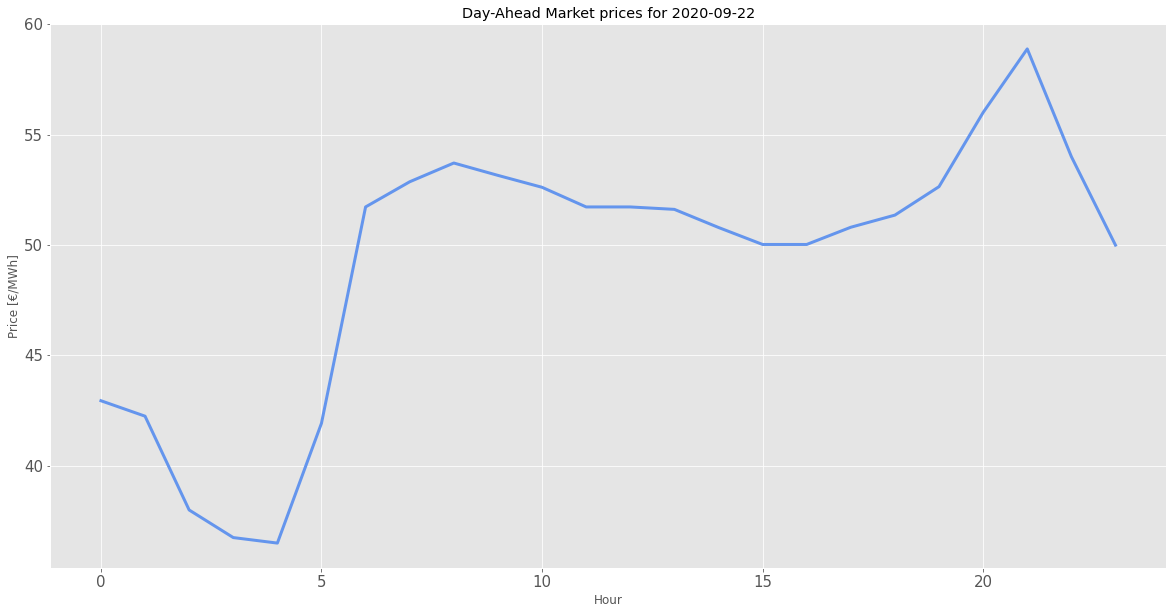

In [142]:
# Diving into the data:
marketlist = []
for stuff in response.json()["indicator"]['values']:
    #print(stuff) ## show more stuff that can be gathered
    if stuff['geo_id'] == 3: ## choose Espana. 1 = Portugal, 2 = Francia
    #print(stuff['value'])
        marketlist.append(stuff['value'])

        
print('\n')
print(f"List of market prices for day {date} in €/MWh:")        
print(marketlist)

plt.style.use('ggplot')
plt.figure(figsize=(20,10))
plt.plot(marketlist,'r',linewidth=3, color='cornflowerblue')
plt.title(f"Day-Ahead Market prices for {date}")
plt.xlabel('Hour')
plt.ylabel('Price [€/MWh]')
plt.show()

In [143]:
len(marketlist)

24